<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial3.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial3.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 3: Extreme Value Analysis - the GEV Distribution

**Week 2, Day 3, Extremes & Variability**

**Content creators:** Matthias Aengenheyster, Joeri Reinders

**Content reviewers:** Younkap Nina Duplex, Sloane Garelick, Paul Heubel, Zahra Khodakaramimaghsoud, Peter Ohue, Laura Paccini, Jenna Pearson, Agustina Pesce, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

*Estimated timing of tutorial:* 30 minutes

In the previous tutorial, you used the empirical method to determine return values. Another approach involves computing the probability of exceeding a certain threshold using a probability density function (PDF) fitted to the data. For instance, in Tutorial 1, we applied the normal distribution PDF. However, the normal distribution did not adequately fit our precipitation data. Here, we will explore fitting a distribution, i.e. the **Generalized Extreme Value (GEV)** distribution, that is typically more suitable for data with skewed histograms.

By the end of this tutorial, you will have gained the following skills:

- Creating a quantile-quantile (QQ) plot to assess the goodness-of-fit between a distribution and the data.
- Fitting a Generalized Extreme Value (GEV) distribution to the data.
- Understanding how the parameters of the GEV distribution influence its behavior.

# Setup

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import genextreme as gev
import os
import pooch
import tempfile

In [2]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W2D3_T3"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.5 MB/s eta 0:00:00


In [3]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [4]:
# @title Helper functions


def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W2D3_ExtremesandVariability"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [5]:
# @title Video 1: Extreme Value Analysis

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'Vblk--ifjsc'), ('Bilibili', 'BV1WM4y1x7aS')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [6]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Extreme_Value_Analysis_Video")

In [7]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "3bv76"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/3bv76/


In [8]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Extreme_Value_Analysis_Slides")

# Section 1: Precipitation Data Histogram and Normal Distribution
Let's repeat our first steps from Tutorials 1 and 2:
1) Open the annual maximum daily precipitation record from Germany.
2) Create a histogram of the data and plot the normal distribution PDF.

In [9]:
# download file: 'precipitationGermany_1920-2022.csv'
filename_precipitationGermany = "precipitationGermany_1920-2022.csv"
url_precipitationGermany = "https://osf.io/xs7h6/download"
data = pd.read_csv(
    pooch_load(url_precipitationGermany, filename_precipitationGermany), index_col=0
).set_index("years")
data.columns = ["precipitation"]
precipitation = data.precipitation

SHA256 hash of downloaded file: ef9f29e709a1db0745c28bcb9460dac22f6c9624de41d9e2187ab547e9aaa3c8
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


Text(0.5, 0, 'Annual Maximum Daily Precipitation \n(mm/day)')

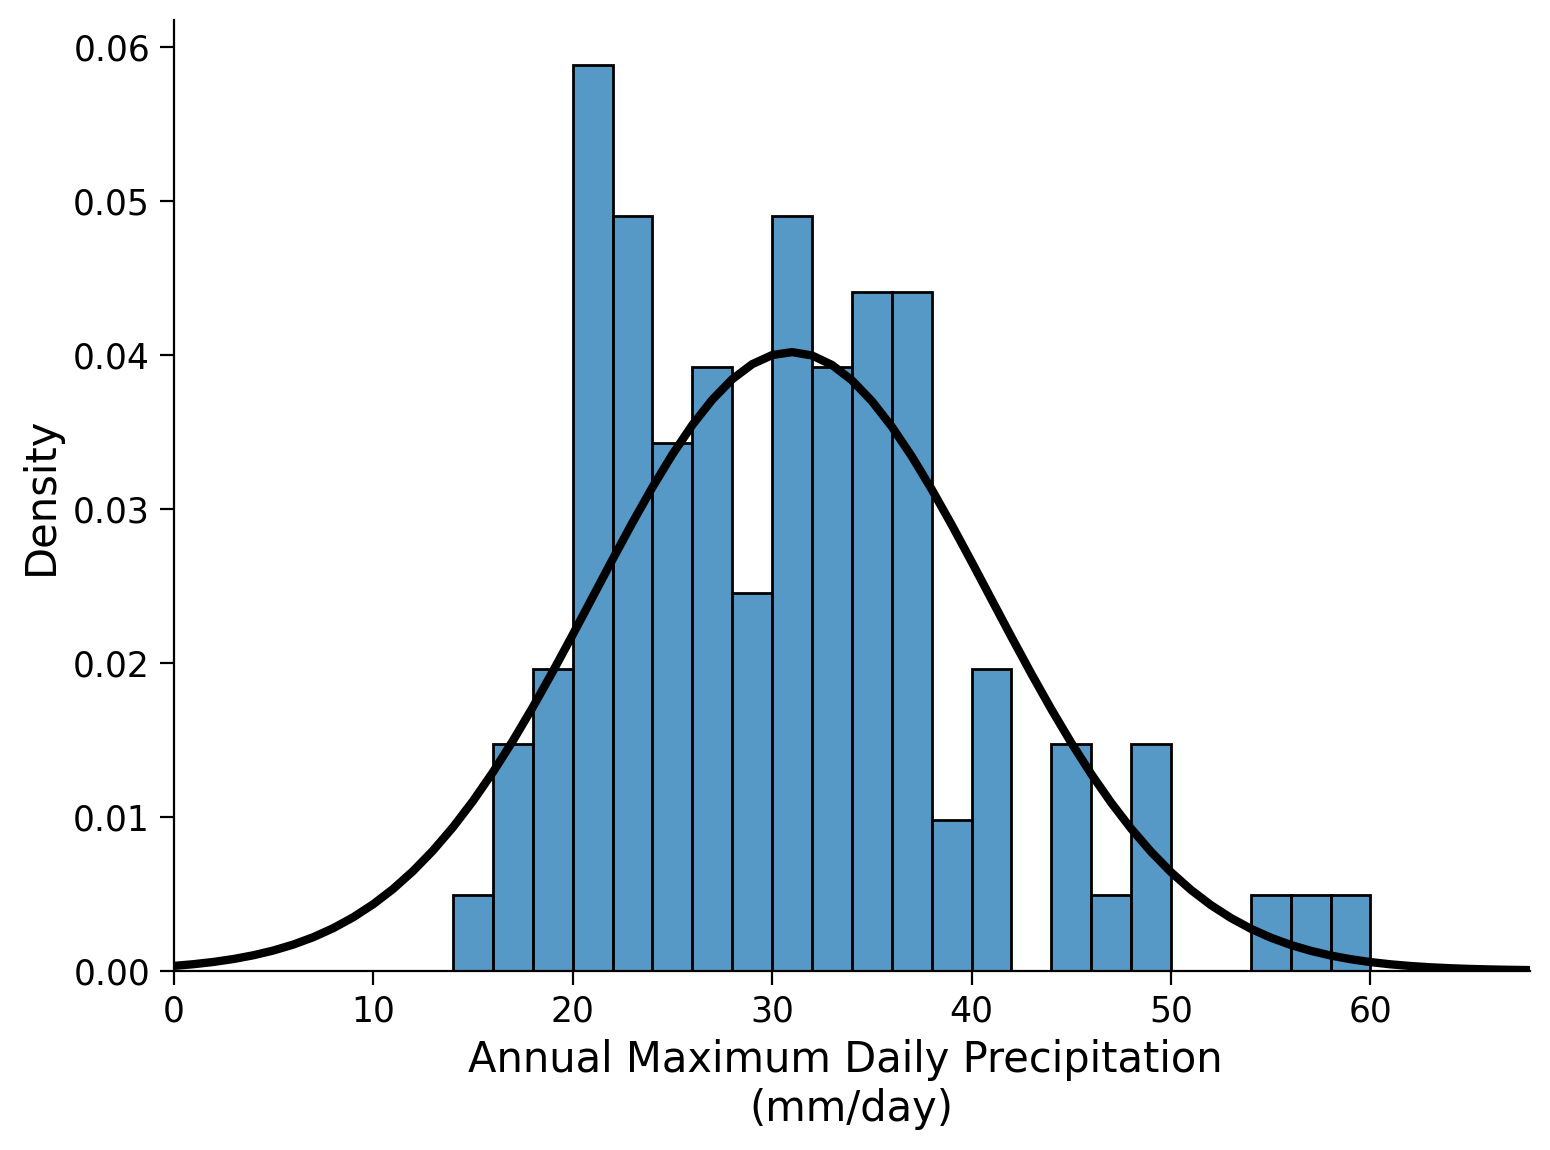

In [10]:
fig, ax = plt.subplots()
x_r100 = np.arange(0, 100, 1)
bins = np.arange(0, precipitation.max(), 2)

# make histogram
sns.histplot(precipitation, bins=bins, stat="density", ax=ax)

# plot PDF
ax.plot(
    x_r100,
    stats.norm.pdf(x_r100, precipitation.mean(), precipitation.std()),
    c="k",
    lw=3,
)

ax.set_xlim(bins[0], bins[-1])
ylim = ax.get_ylim()
ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
Histogram plot of the annual maximum daily precipitation in millimeters per day. The horizontal axis of the histogram represents the data's range via bins, while the vertical axis represents the frequency of occurrences within each interval by counting the number of data points that fall into each bin. By visually inspecting the histogram we get an impression of the shape, central tendency, and spread of the dataset. The bin with the largest amount of occurrences shows 12 counts of annual maximum daily precipitation between 14 and 16 millimeters per day. Bins that show at least one count range from 14 millimeters per day to 60 millimeters per day. Furthermore, the normal distribution is overlaid in black.
</details>

Next, we generate a [quantile-quantile (QQ) plot](https://en.wikipedia.org/wiki/Q–Q_plot) to assess how well our data aligns with a normal distribution. A **QQ plot** compares the *actual* [percentiles](https://en.wikipedia.org/wiki/Percentile) of the data to the *expected* percentiles based on a specific distribution, such as a normal distribution in this case. The percentiles are the points in your data below which a certain proportion of your data falls. Here we will be using [`norm.ppf()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy-stats-norm) where 'ppf' stands for percent point function and returns the quantiles of the normal distribution function (i.e. percentiles). On our precipitation data, we will be using [`numpy.quantile()`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html).

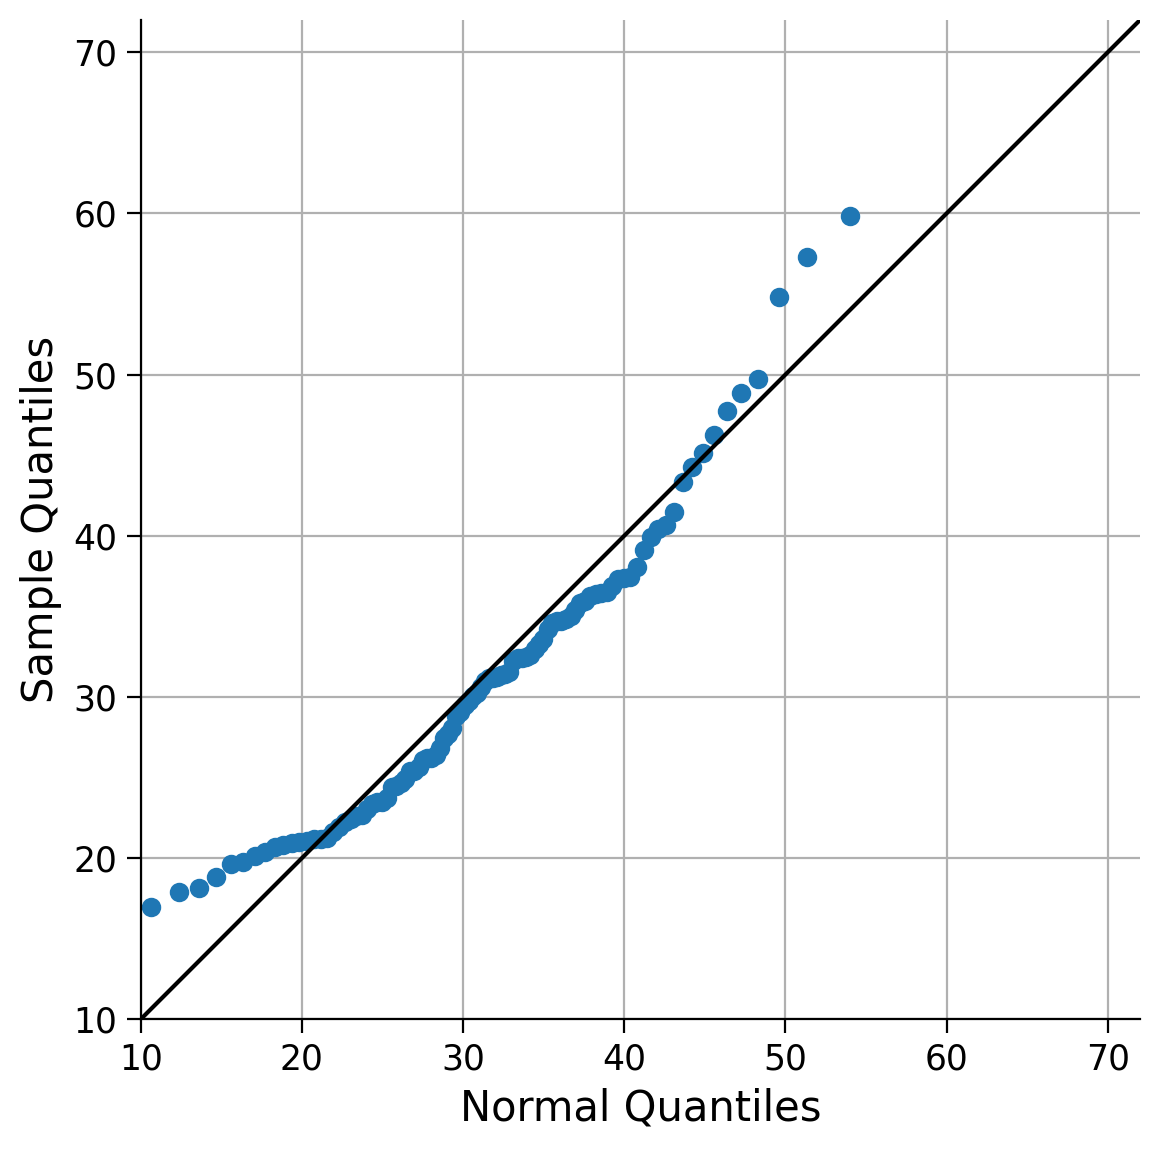

In [11]:
x_r1 = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

ax.plot(stats.norm.ppf(x_r1, precipitation.mean(),
                       precipitation.std()),
        # quantiles of a normal distribution with the mean and std of our precip data
        np.quantile(precipitation, x_r1),  # quantiles of our precip data
        "o",
        )
ax.plot(x_r100, x_r100, "k")

ax.set_xlim(10, 72)
ax.set_ylim(10, 72)

ax.set_xlabel("Normal Quantiles")
ax.set_ylabel("Sample Quantiles")

ax.grid(True)
ax.set_aspect("equal")

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
A quantile-quantile (QQ) plot that compares the actual percentiles of the data with the expected percentiles of the normal distribution. As lower and upper quantiles differ strongly from the identity line, the normal distribution does not represent the data well in terms of extremes.
</details>

If the fit was perfect, the quantile comparison would fall on the identity line (1:1) plotted in black. The stronger the deviations from the identity line, the worse this particular PDF fits our data. Hopefully, you concur that the current fit could be improved, particularly when it comes to the extreme values (lower and upper quantiles), which appear to be over- and underestimated by the normal distribution model. Therefore, let's explore alternative options, as there are numerous other distributions available. One example is the [Generalized Extreme Value (GEV) distribution](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution).

The normal distribution is completely defined by two parameters: its mean and standard deviation.
In contrast, the GEV distribution is defined by three parameters: the location, scale, and shape parameters. When the mean of the normal distribution is increased, it shifts the distribution towards higher values, while increasing the standard deviation makes the distribution wider. The normal distribution is symmetrical to its mean as it lacks a parameter that influences its skewness: There is always exactly half of the distribution to the right and left of its mean. This can pose challenges in certain scenarios.

In the GEV distribution, the location and scale parameters behave similarly to the mean and standard deviation in the normal distribution. The shape parameter impacts the tails of the distribution, making them thinner or thicker. As extreme event distributions often exhibit thick tails, they tend to possess slight skewness. Adjusting the shape parameter, therefore, influences the skewness (and kurtosis) of the data.

To estimate the parameters of the GEV distribution, we utilize the [`stats.genextreme()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html#scipy-stats-genextreme) function from the `scipy` package. Here we call this function `gev`. The GEV distribution's three parameters (location, scale, and shape) can be estimated from data by calling `gev.fit()`. Note the second argument to this function given below is optional, it is the starting guess for the shape parameter. It sometimes makes sense to set this to zero as otherwise the fitting algorithm may be unstable and return incorrect values (hint: always check if your results are sensible!).

In [12]:
shape, loc, scale = gev.fit(precipitation.values,0)

In [13]:
shape, loc, scale

(np.float64(-0.04713587000734158),
 np.float64(26.353581930592185),
 np.float64(7.369405343826601))

Let's generate another histogram of the data and overlay the GEV distribution with the fitted parameters. It's important to note that there are two sign conventions for the shape parameter. You may encounter an application that has it defined the other way around - check the documentation.

Text(0.5, 0, 'Annual Maximum Daily Precipitation \n(mm/day)')

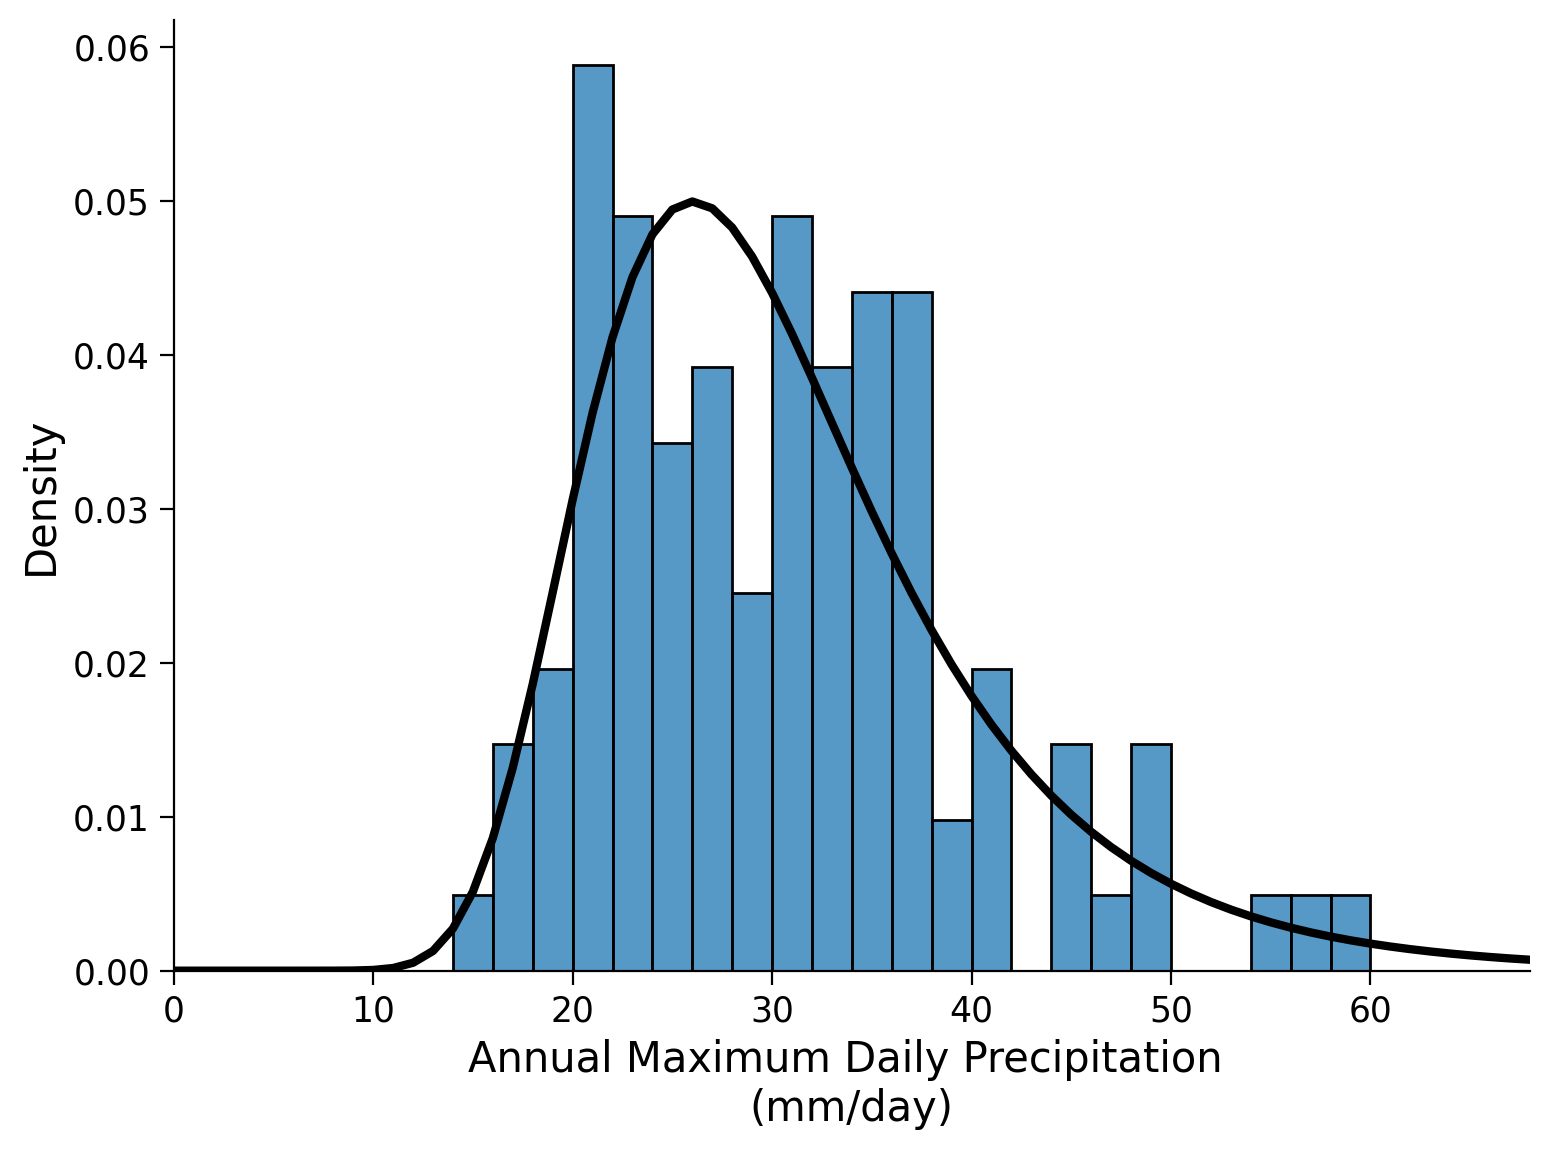

In [14]:
fig, ax = plt.subplots()
# make histogram
sns.histplot(precipitation, bins=bins, stat="density", ax=ax)
ax.set_xlim(bins[0], bins[-1])

# add GEV PDF
x_r80 = np.arange(80)

ax.plot(x_r80, gev.pdf(x_r80, shape, loc=loc, scale=scale), "k", lw=3)
ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
Histogram plot of the annual maximum daily precipitation in millimeters per day as above. Instead of the normal distribution the fitted generalized extreme value (GEV) distribution is overlaid in black. Its skewness and the thicker tails improve the data representation.
</details>

And also create a QQ-plot:

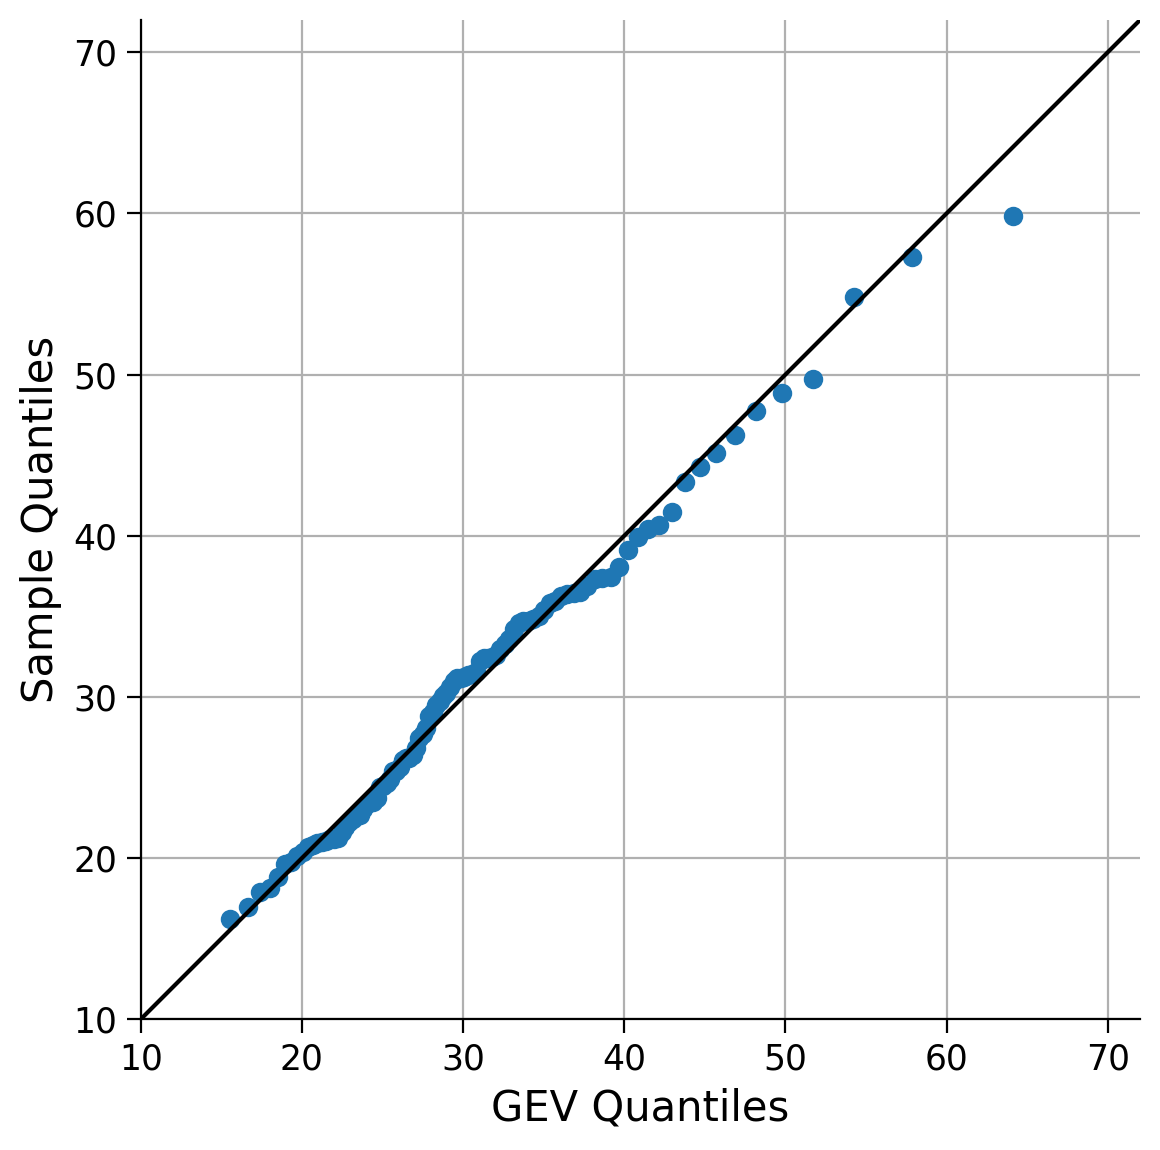

In [15]:
x_r1 = np.linspace(0, 1, 100)
x_r100 = np.linspace(0, 100, 100)

fig, ax = plt.subplots()
ax.plot(
    gev.ppf(x_r1, shape, loc=loc, scale=scale),
    # quantiles of GEV distribution using the parameter estimates from our data
    np.quantile(precipitation, x_r1),
    "o",
)

# actual quantiles of our data
ax.plot(x_r100, x_r100, "k")

# aesthetics
ax.set_xlim(10, 72)
ax.set_ylim(10, 72)

ax.set_xlabel("GEV Quantiles")
ax.set_ylabel("Sample Quantiles")

ax.grid(True)
ax.set_aspect("equal")

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
A quantile-quantile (QQ) plot that compares the actual percentiles of the data with the expected percentiles of the GEV distribution. As lower and upper quantiles differ less from the identity line, the GEV distribution represents the data much better in terms of extremes compared to the normal distribution.
</details>

This looks much better! As we expected, the GEV distribution is a better fit for the data than the normal distribution given the skewness of the data we observed in Tutorial 1.

Now, we will overlay both PDFs (normal and GEV) on a single plot to visualize and compare the differences between them.

Text(0, 0.5, 'Density')

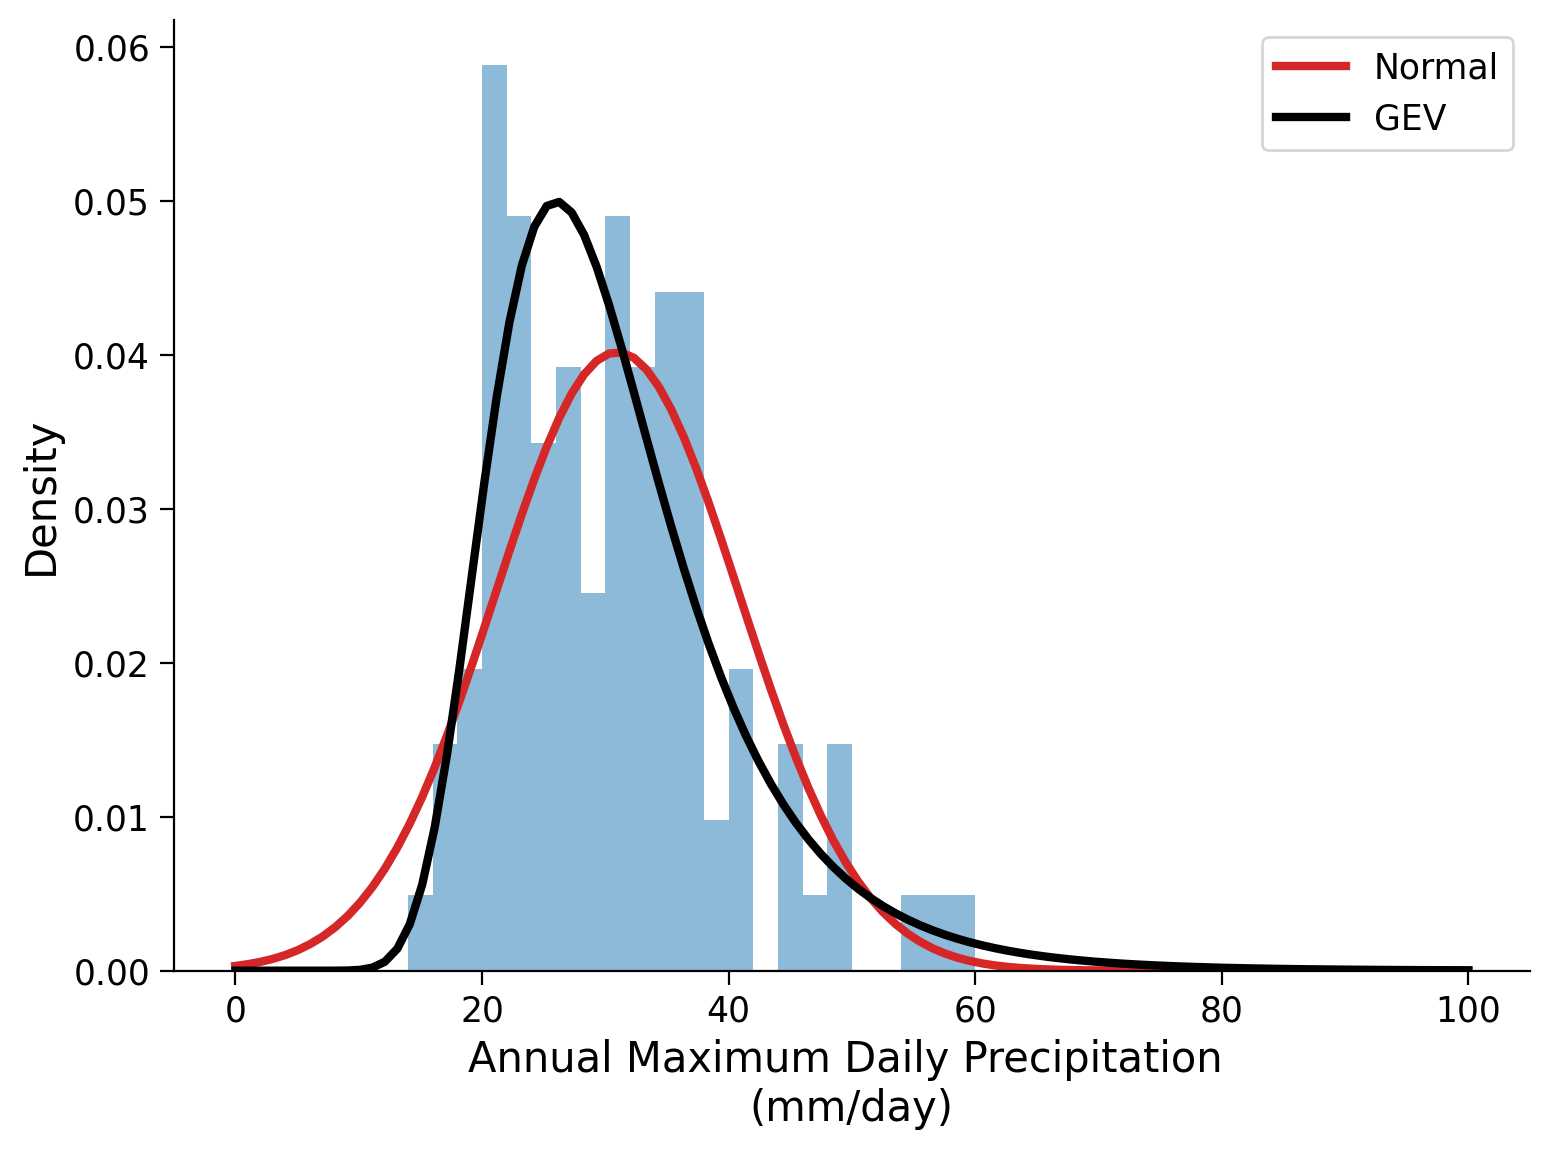

In [16]:
fig, ax = plt.subplots()

sns.histplot(precipitation, bins=bins, stat="density", ax=ax, alpha=0.5, lw=0)

# normal distribution
ax.plot(
    x_r100,
    stats.norm.pdf(x_r100, precipitation.mean(), precipitation.std()),
    c="C3",
    lw=3,
    label="Normal",
)
# GEV distribution
ax.plot(x_r100, gev.pdf(x_r100, shape, loc=loc, scale=scale), c="k", lw=3, label="GEV")
ax.legend()
ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")
ax.set_ylabel("Density")

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
Histogram plot of the annual maximum daily precipitation in millimeters per day as above. Both, the normal distribution and the fitted generalized extreme value (GEV) distribution are overlaid in red and black, respectively.
</details>

How well do the two fitted distributions reflect the observed data and how do they compare to each other?

## Coding Exercise 1

**Parameters of the GEV distribution**

Play a little with the `gev.pdf()` function to get a better sense of how the parameters affect the shape of this particular PDF. Plot the GEV distribution against the ‘x’ sequence and vary one parameter. What does this particular parameter affect?

First, create a plot in the following cell. In this case, the most important, i.e. the shape parameter, is varied while the other two (location, scale) are held constant. The parameter values and ranges below may be a useful starting point.

/tmp/ipython-input-17-3524806233.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0, 0.5, 'Density')

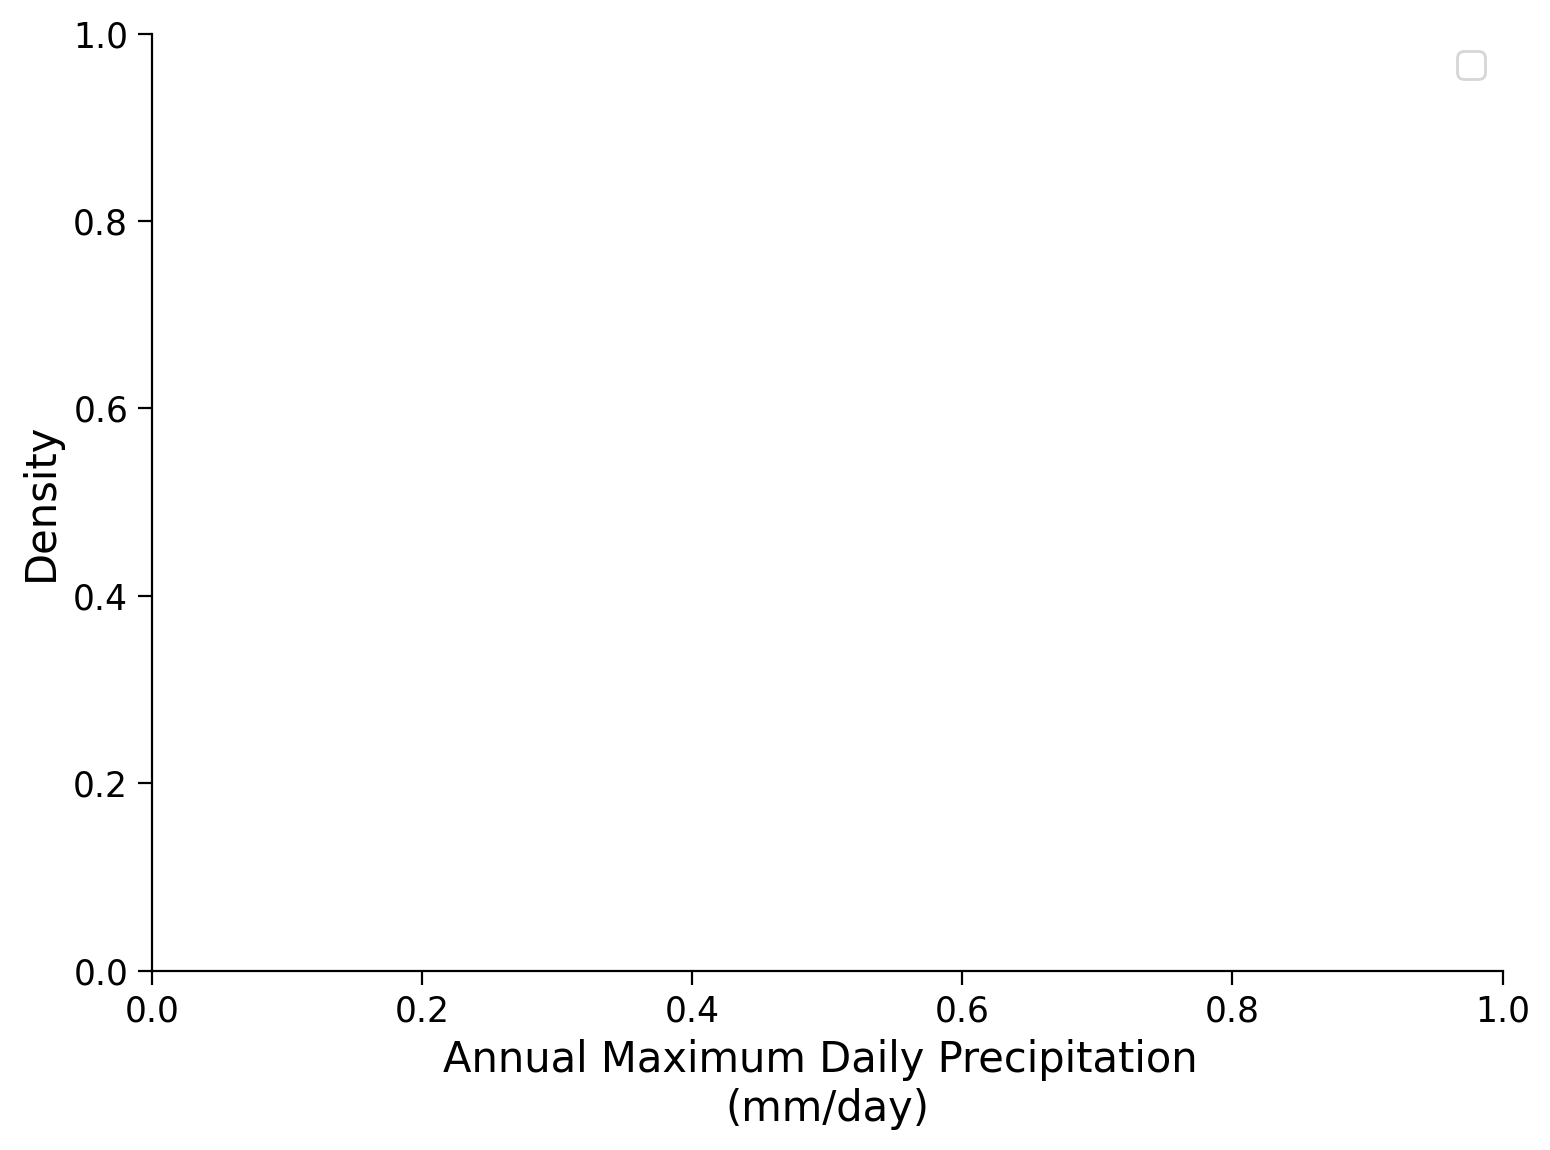

In [17]:
# set range of shape values to use
range_shape = np.arange(-0.4, 0.4 + 0.1, 0.1)

# set scale parameter
scale = 7

# set location parameter
loc = 26

# create precipitation array
x_r80 = np.arange(80,step=0.5)

# setup plots
fig, ax = plt.subplots()

# setup colors to use for lines
colors_shape = plt.cm.coolwarm(np.linspace(0, 1, range_shape.size))

# generate pdf for each shape value
for idx, shapei in enumerate(range_shape):
    ...

# aesthetics
ax.legend()
ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")
ax.set_ylabel("Density")

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial3_Solution_e56638a6.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=575.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D3_ExtremesandVariability/static/W2D3_Tutorial3_Solution_e56638a6_1.png>



In [18]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_1")

Secondly, you can examine the effects of the location and scale parameters on the GEV by changing them with the sliders in the interactive plot below.

In [19]:
# @markdown Interactive Plot: Scale and Location Parameter
from ipywidgets import interact

# slider for scale parameter
scale_slider = widgets.FloatSlider(value=7,
                                   min=4,
                                   max=13,
                                   step=0.2,
                                   description='Scale parameter: ',
                                   disabled=False,
                                   orientation='horizontal',
                                   continuous_update=True,
                                   readout=True,
                                   readout_format='.1f'
                                  )
# slider for location parameter
location_slider = widgets.FloatSlider(value=26,
                                      min=15,
                                      max=50,
                                      step=0.2,
                                      description='Location parameter: ',
                                      disabled=False,
                                      orientation='horizontal',
                                      continuous_update=True,
                                      readout=True,
                                      readout_format='.1f'
                                     )

ui = widgets.HBox([scale_slider, location_slider])

def f(scale,loc):
    # define shape parameter
    shape = 0
    # set x values
    x_r80 = np.linspace(0, 80, 1000)
    # create plot
    fig, ax = plt.subplots()
    # plot GEV PDF with selected parameters
    ax.plot(
            x_r80,
            gev.pdf(x_r80, shape, loc=loc, scale=scale),
            label=f"Parameters:\n\nlocation = {loc:.0f}\nscale = {scale:.0f}\nshape = {shape:.0f}",
            )
    # fix y-axis by defining limits
    ax.set_ylim(-0.005,0.095)
    # aesthetics
    ax.legend()
    ax.set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")
    ax.set_ylabel("Density")

# combine sliders and plotting function
out = widgets.interactive_output(f, {'scale':scale_slider, 'loc':location_slider})
# show interactive plot
display(ui,out)

Output()

We summarize the observed behavior in the following two plots. The top one shows the GEV with varying location parameter, while the bottom one shows the effect of the scale parameter.

Text(0, 0.5, 'Density')

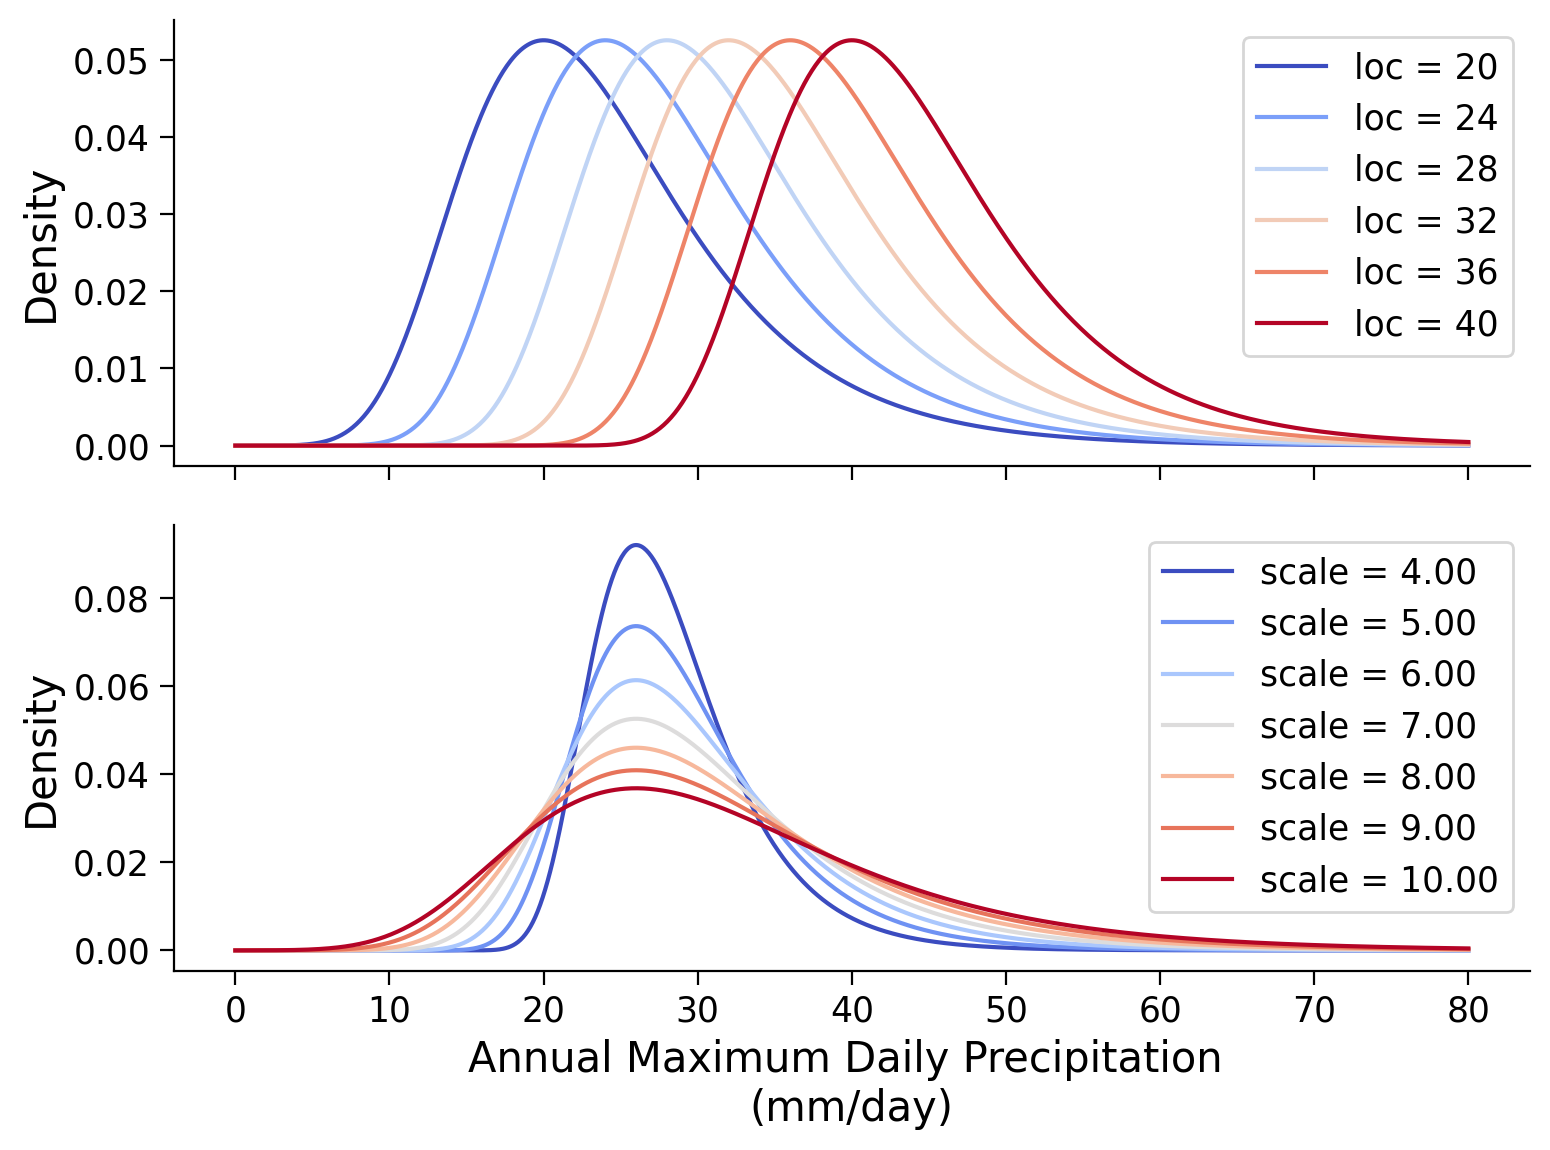

In [20]:
# set range of location & scale values to use
range_loc = np.arange(20, 41, 4)
range_scale = np.arange(4, 11, 1)

# set shape parameter
shape = 0
# set scale parameter for upper plot
scale = 7
# set location parameter for lower plot
loc = 26

# set x values
x_r80 = np.linspace(0, 80, 1000)

# setup plots
fig, axs = plt.subplots(2,1, sharex=True)

# setup colors to use for lines
colors_loc = plt.cm.coolwarm(np.linspace(0, 1, range_loc.size))
colors_scale = plt.cm.coolwarm(np.linspace(0, 1, range_scale.size))

# generate pdf for each location value
for idx, loci in enumerate(range_loc):
    axs[0].plot(
        x_r80,
        gev.pdf(x_r80, shape, loc=loci, scale=scale),
        color=colors_loc[idx],
        label="loc = %i" % loci,
    )
for idx, scalei in enumerate(range_scale):
    axs[1].plot(
        x_r80,
        gev.pdf(x_r80, shape, loc=loc, scale=scalei),
        color=colors_scale[idx],
        label="scale = %.2f" % scalei,
    )
# aesthetics
for i in range(len(axs)):
    axs[i].legend()
    axs[i].set_ylabel("Density")
axs[1].set_xlabel("Annual Maximum Daily Precipitation \n(mm/day)")
axs[1].set_ylabel("Density")

## Questions 1

1. How do the three parameters impact the shape of the distribution? What can you think of how these parameters affect extreme events?**

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial3_Solution_7a0210e5.py)



In [21]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1")

# Summary
In this tutorial, you explored the the Generalized Extreme Value (GEV) distribution suitable for climate variables containing higher probabilities of extreme events. You used scipy to estimate these parameters from our data and fit a GEV distribution. You compared the fit of the normal and GEV distributions to your data using Quantile-Quantile (QQ) plots and overlaid the probability density functions of both distributions for visual comparison. Finally, you manipulated the parameters of the GEV distribution to understand their effects on the shape of the distribution.

# Resources

Data from this tutorial uses the 0.25 degree precipitation dataset E-OBS. It combines precipitation observations to generate a gridded (i.e. no "holes") precipitation over Europe. We used the precipitation data from the gridpoint at 51 N, 6 E.

The dataset can be accessed using the KNMI Climate Explorer [here](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=ensembles_025_rr). The Climate Explorer is a great resource to access, manipulate and visualize climate data, including observations and climate model simulations. It is freely accessible - feel free to explore!